# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

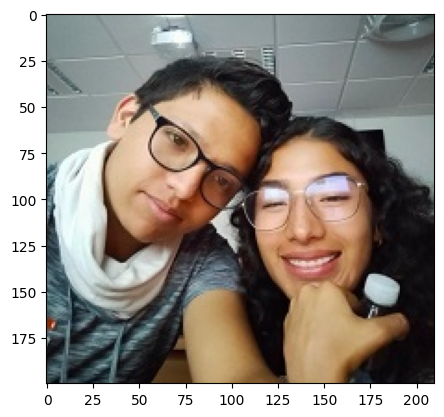

In [2]:
img = cv2.cvtColor(cv2.imread("../data/Ow.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

14493287

In [4]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

    return out

In [5]:
h, w, c = img.shape

bounds = [
    [0, w],# x
    [0, h], # y
    [5, (w + h)//4], # radius
    [0, 255], # B
    [0, 255], # G
    [0, 255], # R
    [0.3, 1], # alpha
]

nIter, cR, popSize = 500, 0.75, 100

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

{'P': array([ 78.05950592,  20.24417464, 102.        , 235.92845826,
       254.73860819, 255.        ,   0.47910743]), 'nIt': 100, 'fun': 11861935, 'nFev': 10100}


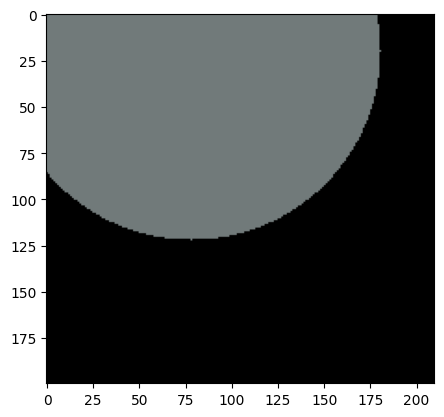

{'P': array([202.07024145,  44.08250352,  13.21986503, 123.32356263,
       124.35708742,   0.        ,   0.38349683]), 'nIt': 100, 'fun': 5950933, 'nFev': 10100}


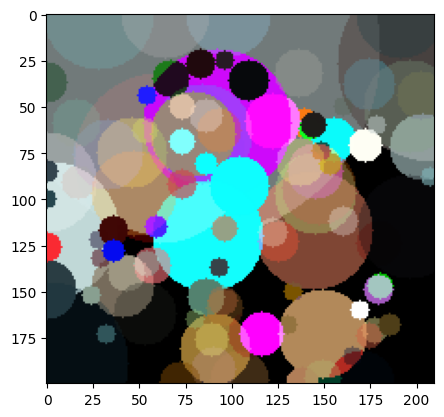

{'P': array([  0.        , 168.1368145 ,   5.        ,  76.66845501,
         0.        , 255.        ,   1.        ]), 'nIt': 100, 'fun': 5231298, 'nFev': 10100}


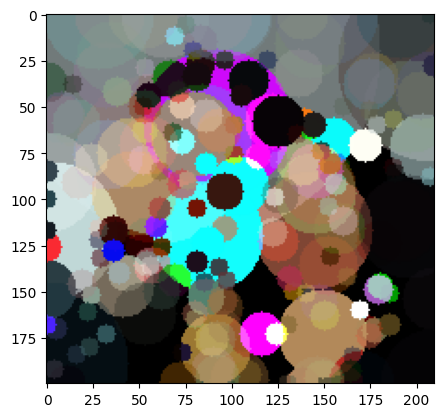

{'P': array([ 83.62348062, 108.81969433,   5.03492406, 224.19642311,
         0.        ,   0.        ,   0.34021387]), 'nIt': 100, 'fun': 4821980, 'nFev': 10100}


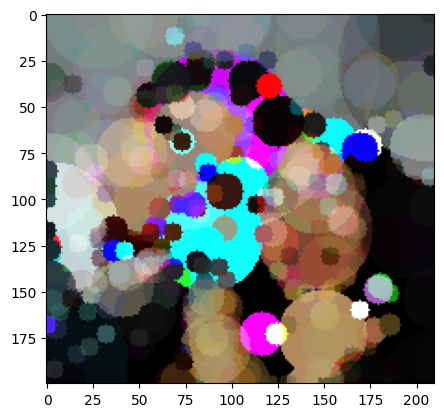

{'P': array([150.76394236, 165.53039845,   9.20112102,   0.        ,
         0.        , 124.27968864,   0.82018193]), 'nIt': 100, 'fun': 4559569, 'nFev': 10100}


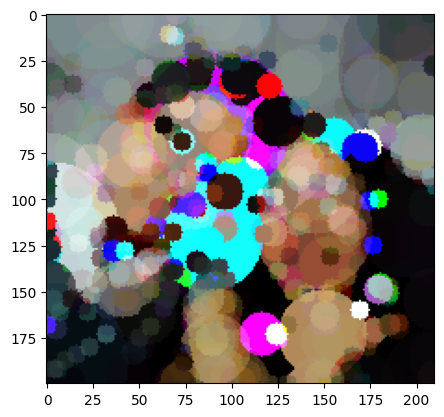

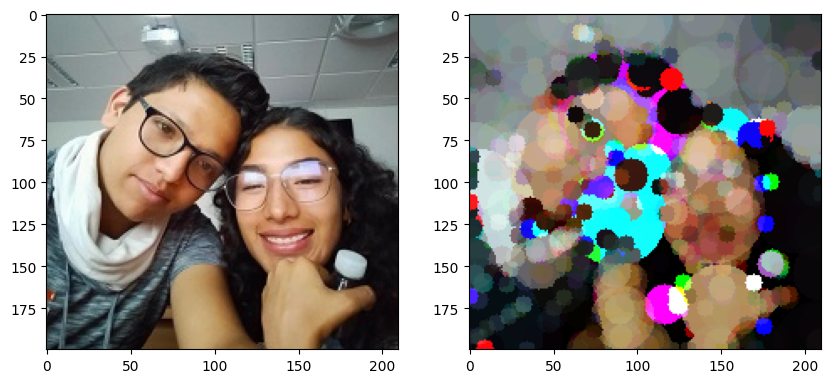

In [7]:
out = np.zeros_like(img)
data = np.zeros((nIter, len(bounds)))
lastFitness = 100000000
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = 100) #The smaller cR is, it takes less risks
    if r['fun'] > lastFitness: continue
    if True: data[i] = r["P"]
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(r)
        draw_circle(r["P"], out, True)
    lastFitness = r['fun']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(out) 

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

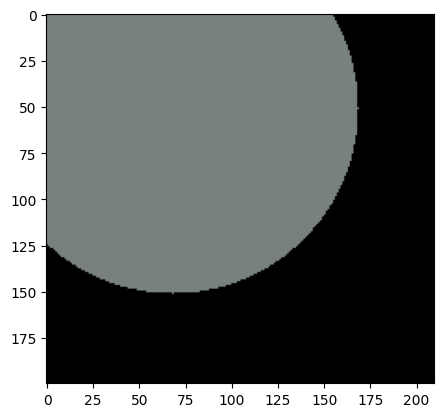

0      fun: 11878353.0
 message: 'Optimization terminated successfully.'
    nfev: 18208
     nit: 25
 success: True
       x: array([ 68.33222613,  51.46439405, 100.12892602, 192.87021889,
       204.74686007, 204.89584109,   0.62561131])


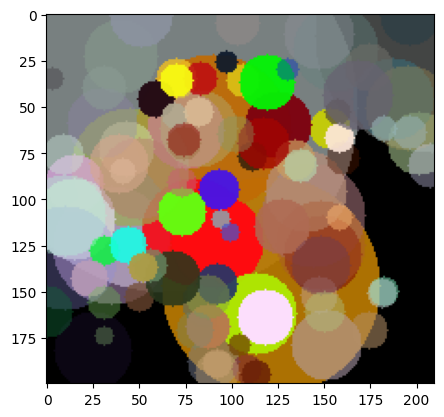

100      fun: 6806153.0
 message: 'Optimization terminated successfully.'
    nfev: 4908
     nit: 6
 success: True
       x: array([ 92.09318586, 194.14382855,  12.02847677, 212.7829343 ,
       177.00500657, 126.30650958,   0.36981028])


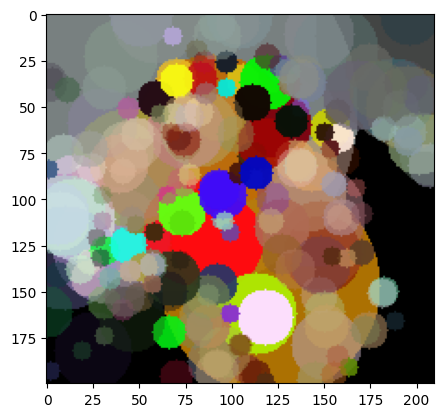

200      fun: 6034249.0
 message: 'Optimization terminated successfully.'
    nfev: 5608
     nit: 7
 success: True
       x: array([ 18.10568681, 138.8435385 ,   8.23499427, 199.30327536,
       250.03695875, 207.08467991,   0.50537791])


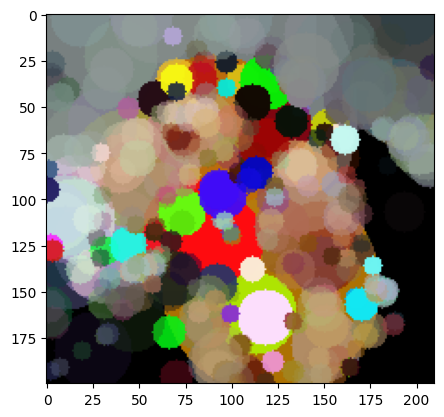

300      fun: 5596661.0
 message: 'Optimization terminated successfully.'
    nfev: 5608
     nit: 7
 success: True
       x: array([193.80514294,  66.74920155,   8.01320896, 162.75321615,
       185.69695969, 137.36196874,   0.35048658])


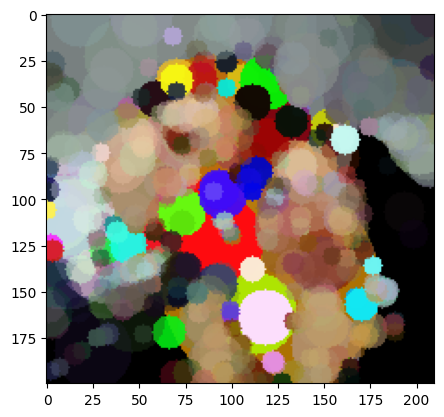

400      fun: 5327928.0
 message: 'Optimization terminated successfully.'
    nfev: 7708
     nit: 10
 success: True
       x: array([174.5118992 ,  61.61878856,   5.77542769, 160.16449294,
       131.58088928, 152.70668126,   0.93524295])


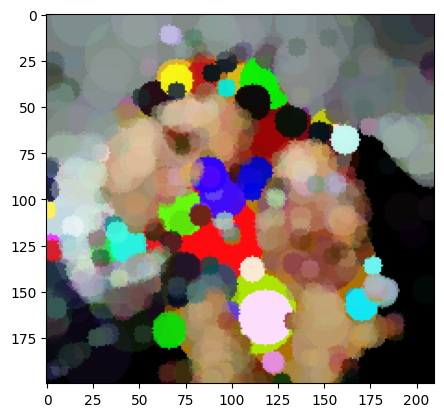

In [9]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize= popSize)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

### Make Animation

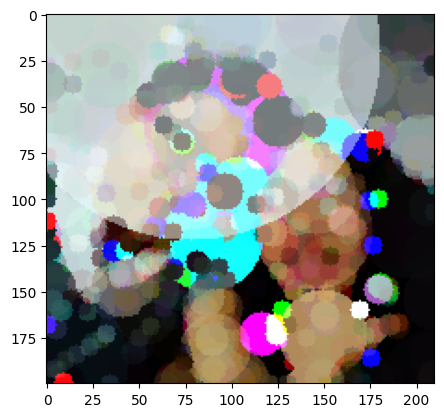

In [10]:
import matplotlib.animation as animation
from IPython import display
import time

fig = plt.figure()


imageToAnimate = np.zeros(img.shape, np.uint8)
plt.imshow(imageToAnimate)
def animate(frame_number):
    draw_circle(data[frame_number], imageToAnimate)
    plt.imshow(imageToAnimate)

if True:
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=20)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)